### Insights for Cleaning checklist
 - Entrepreneurs are irrelevant to analysis - good to ignore, will keep for database purposes.
 - Websites are irrelevant to analysis - good to ignore, will keep for database purposes.
 - Episode/season column imported as a date time, will use as a key in the database so need to transform column/mutate to non-date time

In [23]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from src.util import check_nulls


In [2]:
df = pd.read_excel('datasets/Shark Tank Companies.xlsx')

In [3]:
df.sample(4)

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
158,False,A home gym for a total body workout.,15,Fitness Equipment,Frank Campitelli and Debrae Barensfeld,"Akron, OH",http://www.thenitroforce.com/,250000,10,2500000,3,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Nitroforce Industries,2015-03-01,True
38,True,Women's apparel specially designed for sizes 1...,9,Women's Apparel,Gayla Bentley,"Houston, TX",http://www.gaylabentley.com/,250000,20,1250000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Gayla Bentley Fashion,2023-09-01,False
119,True,Adjustable necklaces and bracelets with interc...,5,Baby and Children's Apparel and Accessories,"Maddie, Margot and Diane Bradshaw","Dallas, TX",http://www.snapcapsonline.com/,300000,15,2000000,3,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,M3 Girl Designs,2023-05-03,True
134,True,Stand-up paddle boarding products.,9,Outdoor Recreation,Stephan Aarstol,"San Diego, CA",http://www.towerpaddleboards.com/,150000,10,1500000,3,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Tower Paddle Boards,2023-09-03,False


In [15]:
summary_dict = check_nulls(df)

for k, v in summary_dict.items():
    print(f'{k}: {v}')

deal: 0
description: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
episode: 0
category: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
entrepreneurs: {'standard_nulls': 72, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
location: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
website: {'standard_nulls': 38, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
askedFor: 0
exchangeForStake: 0
valuation: 0
season: 0
shark1: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
shark2: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
shark3: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
shark4: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
shark5: {'standard_nulls': 0, 'empty_strings': 0, 'specific_v

In [4]:
df.isnull().sum()

deal                       0
description                0
episode                    0
category                   0
entrepreneurs             72
location                   0
website                   38
askedFor                   0
exchangeForStake           0
valuation                  0
season                     0
shark1                     0
shark2                     0
shark3                     0
shark4                     0
shark5                     0
title                      0
episode-season             0
Multiple Entreprenuers     0
dtype: int64

In [5]:
df.loc[df['website'].isna(), :].head(1)         

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,2023-01-01,False


In [6]:
df.loc[df['entrepreneurs'].isna(), :].head(1)   

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
185,True,Possibly the most successful product in Shark ...,7,Kitchen Tools,NaN,"Folcroft, PA",http://scrubdaddy.com,100000,10,1000000,4,Lori Greiner,Robert Herjavec,Kevin O'Leary,Daymond John,Mark Cuban,Scrub Daddy,2023-07-04,False


In [7]:
df.duplicated().value_counts()

False    495
Name: count, dtype: int64

In [8]:
df.shape

(495, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   deal                    495 non-null    bool          
 1   description             495 non-null    object        
 2   episode                 495 non-null    int64         
 3   category                495 non-null    object        
 4   entrepreneurs           423 non-null    object        
 5   location                495 non-null    object        
 6   website                 457 non-null    object        
 7   askedFor                495 non-null    int64         
 8   exchangeForStake        495 non-null    int64         
 9   valuation               495 non-null    int64         
 10  season                  495 non-null    int64         
 11  shark1                  495 non-null    object        
 12  shark2                  495 non-null    object    

In [10]:
df[['episode', 'season', 'episode-season']]

,episode,season,episode-season
0,1,1,2023-01-01
1,1,1,2023-01-01
2,1,1,2023-01-01
3,1,1,2023-01-01
4,1,1,2023-01-01
...,...,...,...
490,28,6,2028-06-01
491,29,6,2029-06-01
492,29,6,2029-06-01
493,29,6,2029-06-01


In [11]:
df['episode-season'].value_counts()

episode-season
2023-04-01    9
2023-05-01    9
2023-06-01    9
2023-01-01    5
2023-02-01    5
             ..
2023-01-04    4
2015-03-01    4
2014-03-01    4
2029-06-01    4
2023-08-04    3
Name: count, Length: 119, dtype: int64

In [12]:
df.dtypes

deal                                bool
description                       object
episode                            int64
category                          object
entrepreneurs                     object
location                          object
website                           object
askedFor                           int64
exchangeForStake                   int64
valuation                          int64
season                             int64
shark1                            object
shark2                            object
shark3                            object
shark4                            object
shark5                            object
title                             object
episode-season            datetime64[ns]
Multiple Entreprenuers              bool
dtype: object

deal: 0
description: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
episode: 0
category: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
entrepreneurs: {'standard_nulls': 72, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
location: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
website: {'standard_nulls': 38, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
askedFor: 0
exchangeForStake: 0
valuation: 0
season: 0
shark1: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
shark2: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
shark3: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
shark4: {'standard_nulls': 0, 'empty_strings': 0, 'specific_values': 0, 'whitespace_only': 0}
shark5: {'standard_nulls': 0, 'empty_strings': 0, 'specific_v

In [14]:
df.columns

Index(['deal', 'description', 'episode', 'category', 'entrepreneurs',
       'location', 'website', 'askedFor', 'exchangeForStake', 'valuation',
       'season', 'shark1', 'shark2', 'shark3', 'shark4', 'shark5', 'title',
       'episode-season', 'Multiple Entreprenuers'],
      dtype='object')

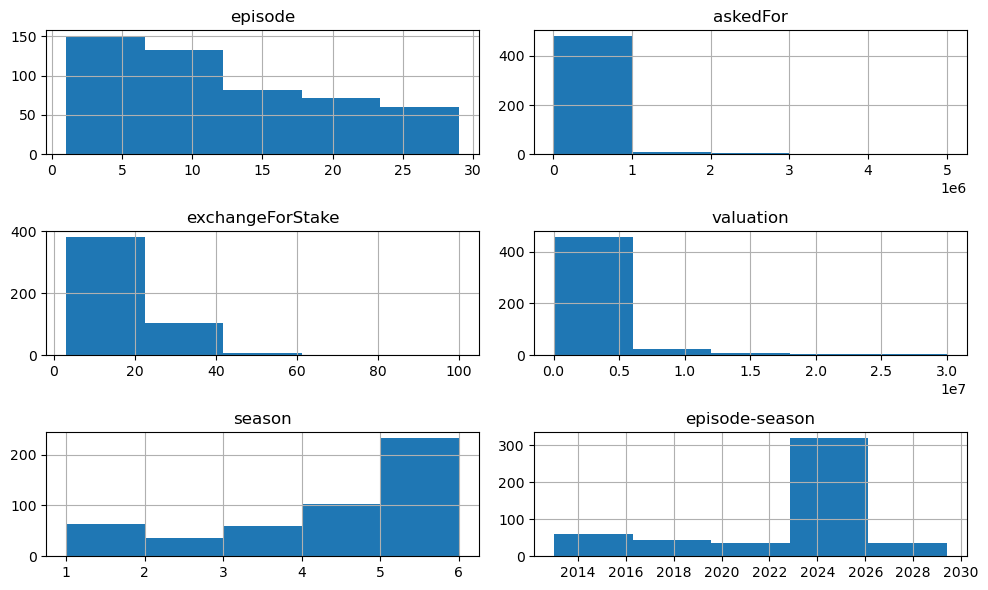

In [25]:
# Lets visualize our dataset - TRY THIS AGAIN AFTER CLEANING. 
df.hist(bins=5, figsize=(10,6))
plt.tight_layout()
plt.show()